In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

# Ensure inline plotting
%matplotlib inline

In [3]:
# Load the dataset
file_path = r'C:\Users\dell\Desktop\MyDocs\Docs\MK\Eminem Dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,artist_name,track_name,track_id,album_name,album_id,release_date,popularity,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,featured_artists,type,duration,year,month,day_of_the_week
0,Eminem,8 Mile,5NmL2zxnlt9GiTB2TQbvFM,8 Mile (Music From And Inspired By The Motion ...,353HFOqGHySp027oyr3aGs,2002-10-29,60,True,0.740,0.940,...,0.132,0.489,89.981,4,NaN,Soundtrack Album,05:59,2002,October,Tuesday
1,Eminem,Rabbit Run,30KKYkJ0lonfKI2eaLACnZ,8 Mile (Music From And Inspired By The Motion ...,353HFOqGHySp027oyr3aGs,2002-10-29,53,True,0.563,0.842,...,0.160,0.336,95.392,4,NaN,Soundtrack Album,03:10,2002,October,Tuesday
2,Eminem,Lose Yourself,6GkTKjv1XbFVdI2D8vvDPu,8 Mile (Music From And Inspired By The Motion ...,353HFOqGHySp027oyr3aGs,2002-10-29,53,True,0.684,0.735,...,0.288,0.060,171.383,4,NaN,Soundtrack Album,05:20,2002,October,Tuesday
3,Eminem,Campaign Speech,1DiJsj5a4zBzWSUWdg2nTv,Campaign Speech,2mr6tc72GnDU2RJoLCQ1qX,2016-10-19,32,True,0.624,0.785,...,0.201,0.686,61.918,3,NaN,Single,07:48,2016,October,Wednesday
4,Eminem,Chloraseptic (feat. 2 Chainz & Phresher) - Remix,756ZV0boQJ6Kbk3WFBuVjD,Chloraseptic (feat. 2 Chainz & Phresher) [Remix],4J3umaQxh7W2eKIx0p2ErW,2018-01-08,43,True,0.887,0.725,...,0.333,0.441,135.950,4,"2 Chainz, PHresher",Single,04:56,2018,January,Monday


In [5]:
# Check for missing values
df.isnull().sum()

# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Drop rows with missing release_date
df.dropna(subset=['release_date'], inplace=True)

# Extract year, month, and day_of_week from release_date
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month
df['day_of_week'] = df['release_date'].dt.day_name()

# Display the cleaned dataset
df.head()

,artist_name,track_name,track_id,album_name,album_id,release_date,popularity,explicit,danceability,energy,...,valence,tempo,time_signature,featured_artists,type,duration,year,month,day_of_the_week,day_of_week
0,Eminem,8 Mile,5NmL2zxnlt9GiTB2TQbvFM,8 Mile (Music From And Inspired By The Motion ...,353HFOqGHySp027oyr3aGs,2002-10-29,60,True,0.740,0.940,...,0.489,89.981,4,NaN,Soundtrack Album,05:59,2002,10,Tuesday,Tuesday
1,Eminem,Rabbit Run,30KKYkJ0lonfKI2eaLACnZ,8 Mile (Music From And Inspired By The Motion ...,353HFOqGHySp027oyr3aGs,2002-10-29,53,True,0.563,0.842,...,0.336,95.392,4,NaN,Soundtrack Album,03:10,2002,10,Tuesday,Tuesday
2,Eminem,Lose Yourself,6GkTKjv1XbFVdI2D8vvDPu,8 Mile (Music From And Inspired By The Motion ...,353HFOqGHySp027oyr3aGs,2002-10-29,53,True,0.684,0.735,...,0.060,171.383,4,NaN,Soundtrack Album,05:20,2002,10,Tuesday,Tuesday
3,Eminem,Campaign Speech,1DiJsj5a4zBzWSUWdg2nTv,Campaign Speech,2mr6tc72GnDU2RJoLCQ1qX,2016-10-19,32,True,0.624,0.785,...,0.686,61.918,3,NaN,Single,07:48,2016,10,Wednesday,Wednesday
4,Eminem,Chloraseptic (feat. 2 Chainz & Phresher) - Remix,756ZV0boQJ6Kbk3WFBuVjD,Chloraseptic (feat. 2 Chainz & Phresher) [Remix],4J3umaQxh7W2eKIx0p2ErW,2018-01-08,43,True,0.887,0.725,...,0.441,135.950,4,"2 Chainz, PHresher",Single,04:56,2018,1,Monday,Monday


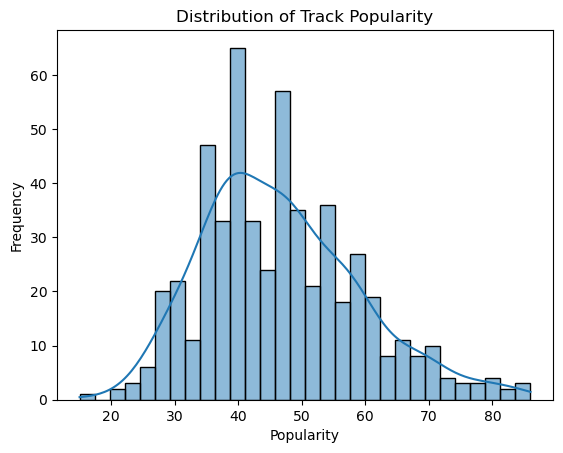

In [7]:
# Plot the distribution of track popularity
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

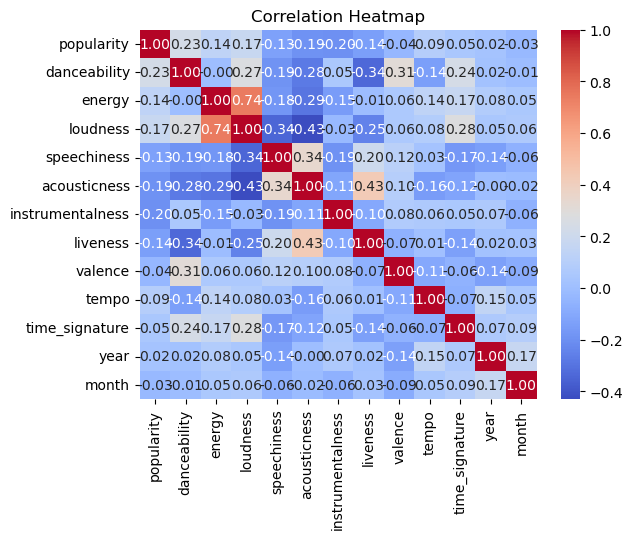

In [9]:
# Correlation heatmap of numeric features
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

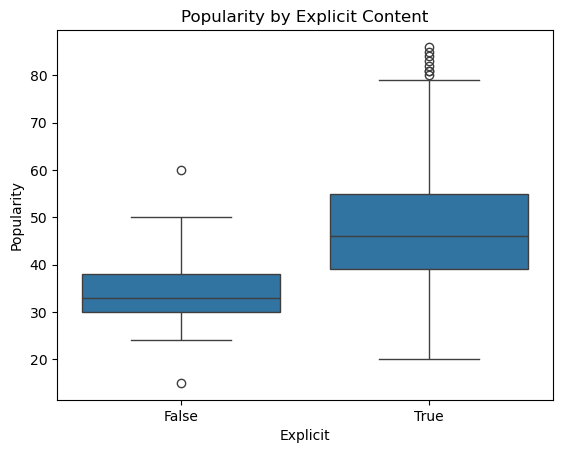

In [11]:
# Box plot of popularity by explicit content
sns.boxplot(x='explicit', y='popularity', data=df)
plt.title('Popularity by Explicit Content')
plt.xlabel('Explicit')
plt.ylabel('Popularity')
plt.show()

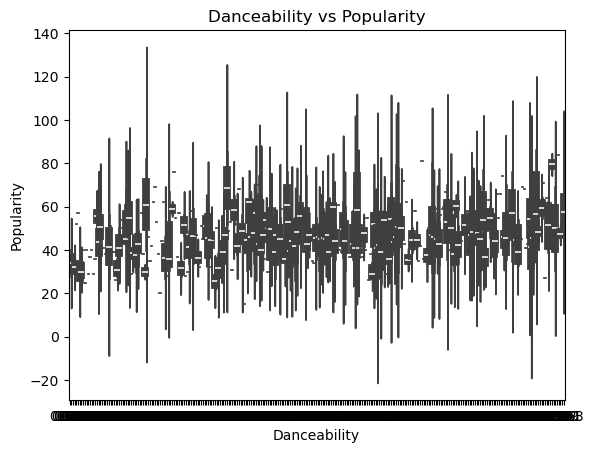

In [13]:
# Violin plot of danceability vs popularity
sns.violinplot(x='danceability', y='popularity', data=df)
plt.title('Danceability vs Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()


In [15]:
# Define features and target variable
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features]
y = df['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2


(189.85122887570094, -0.19886629444668413)

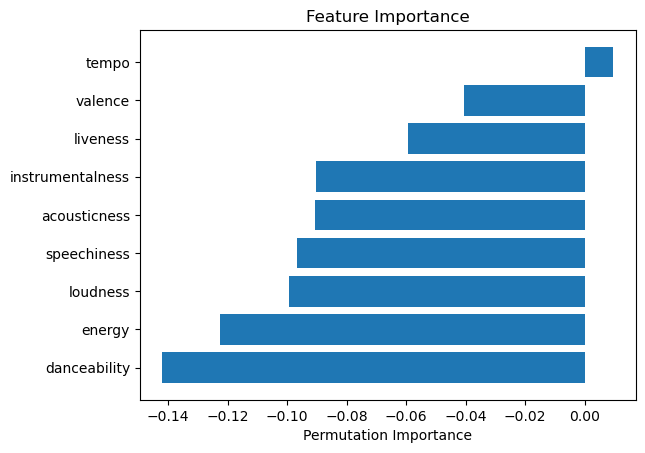

In [17]:
# Permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features, perm_importance.importances_mean[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')
plt.show()